In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
from pandas_datareader import data as web

## lets get the stock data

In [35]:
portfolio = ["TSLA", "FB", "AMZN", "AAPL"]
stock_DataFrame = pd.DataFrame()
for t in portfolio:
    stock_DataFrame[t] = web.DataReader(t, "yahoo", start = "2013-1-1")["Adj Close"]

In [36]:
stock_DataFrame.head()

,TSLA,FB,AMZN,AAPL
Date,,,,
2013-01-02,35.360001,28.000000,257.309998,68.850548
2013-01-03,34.770000,27.770000,258.480011,67.981491
2013-01-04,34.400002,28.760000,259.149994,66.087891
2013-01-07,34.340000,29.420000,268.459991,65.699158
2013-01-08,33.680000,29.059999,266.380005,65.875954


## we will get the daily changes for each security

In [37]:
stock_DataFrame["TSLA_Daily_Change"] = stock_DataFrame["TSLA"].pct_change()

In [38]:
stock_DataFrame["FB_Daily_Change"] = stock_DataFrame["FB"].pct_change()

In [39]:
stock_DataFrame["AMZN_Daily_Change"] = stock_DataFrame["AMZN"].pct_change()

In [40]:
stock_DataFrame["AAPL_Daily_Change"] = stock_DataFrame["AAPL"].pct_change()

In [44]:
stock_DataFrame.tail()

,TSLA,FB,AMZN,AAPL,TSLA_Daily_Change,FB_Daily_Change,AMZN_Daily_Change,AAPL_Daily_Change
Date,,,,,,,,
2020-01-03,443.010010,208.669998,1874.969971,297.429993,0.029633,-0.005291,-0.012139,-0.009722
2020-01-06,451.540009,212.600006,1902.880005,299.799988,0.019255,0.018834,0.014886,0.007968
2020-01-07,469.059998,213.059998,1906.859985,298.390015,0.038801,0.002164,0.002092,-0.004703
2020-01-08,492.140015,215.220001,1891.969971,303.190002,0.049205,0.010138,-0.007809,0.016086
2020-01-09,481.339996,218.300003,1901.050049,309.630005,-0.021945,0.014311,0.004799,0.021241


## WE will plot the daily changes to observe the movement of each security

In [56]:
daily_changes_df = pd.concat([stock_DataFrame["TSLA_Daily_Change"], stock_DataFrame["FB_Daily_Change"], stock_DataFrame["AMZN_Daily_Change"], stock_DataFrame["AAPL_Daily_Change"]], axis=1)

In [58]:
daily_changes_df.head()

,TSLA_Daily_Change,FB_Daily_Change,AMZN_Daily_Change,AAPL_Daily_Change
Date,,,,
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-0.016686,-0.008214,0.004547,-0.012622
2013-01-04,-0.010641,0.035650,0.002592,-0.027855
2013-01-07,-0.001744,0.022949,0.035925,-0.005882
2013-01-08,-0.019220,-0.012237,-0.007748,0.002691


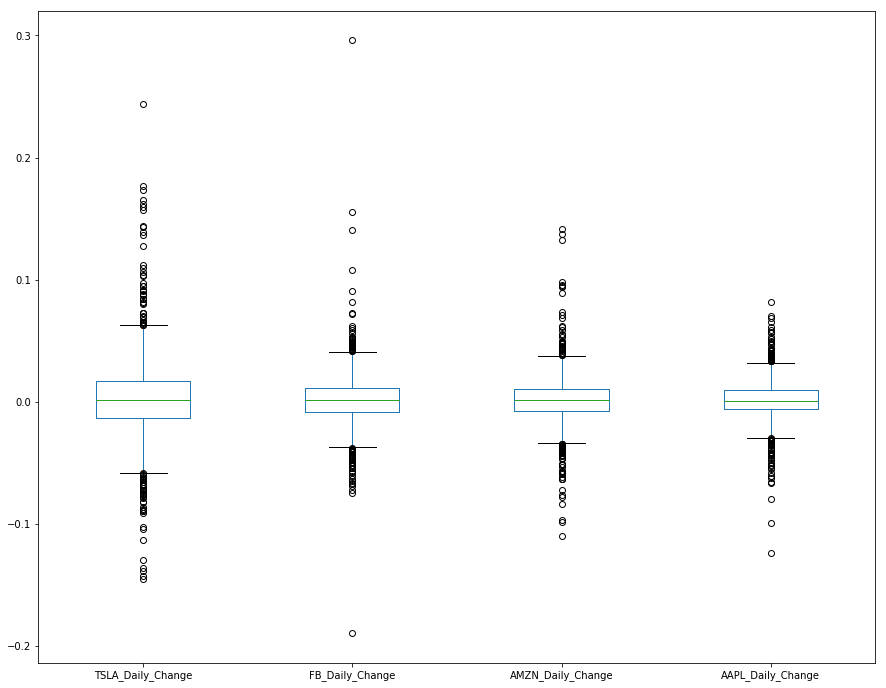

In [66]:
daily_changes_df.plot(kind = "box", figsize = (15,12), label = "Port daily changes");

_____

## WE will calculate the cumulative returns for each stock

In [50]:
stock_DataFrame["TSLA Daily Return"] = (1 + stock_DataFrame["TSLA_Daily_Change"]).cumprod()

In [52]:
stock_DataFrame["FB Daily Return"] = (1 + stock_DataFrame["FB_Daily_Change"]).cumprod()

In [53]:
stock_DataFrame["AMZN Daily Return"] = (1 + stock_DataFrame["AMZN_Daily_Change"]).cumprod()

In [54]:
stock_DataFrame["AAPL Daily Return"] = (1 + stock_DataFrame["AAPL_Daily_Change"]).cumprod()

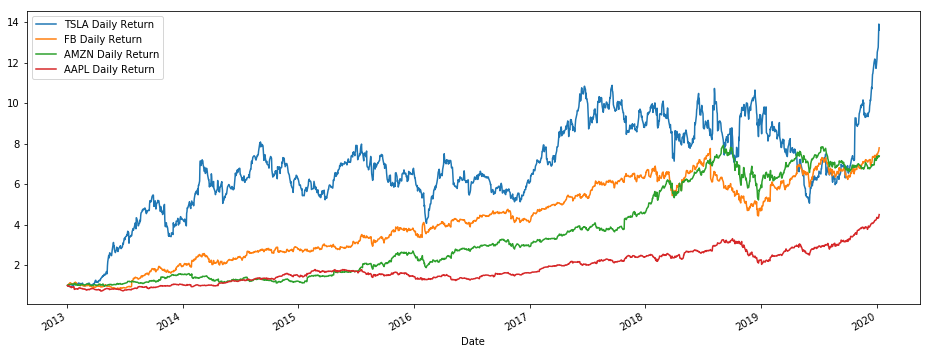

In [69]:
stock_DataFrame[["TSLA Daily Return", "FB Daily Return", "AMZN Daily Return","AAPL Daily Return"]].plot(figsize = (16,6))
plt.legend();

#### Looks like Apple provided the highest returns over the years. Lets take a look at the Exponential Weighted Moving Averge

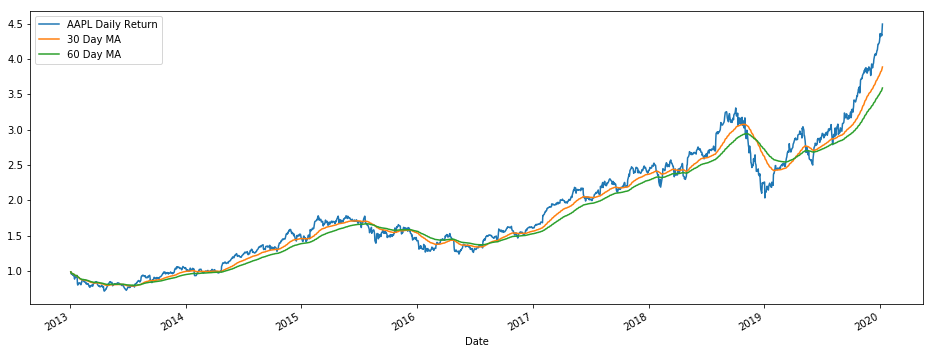

In [74]:
stock_DataFrame["AAPL Daily Return"].plot(figsize = (16,6))
stock_DataFrame["AAPL Daily Return"].ewm(30).mean().plot(label = "30 Day MA")
stock_DataFrame["AAPL Daily Return"].ewm(60).mean().plot(label = "60 Day MA")
plt.legend();

### LEts also run a ETS (ERROR, TREND, SEASONAL) Model on Apple as well

In [83]:
ets_results = seasonal_decompose(stock_DataFrame["AAPL"], freq=12)

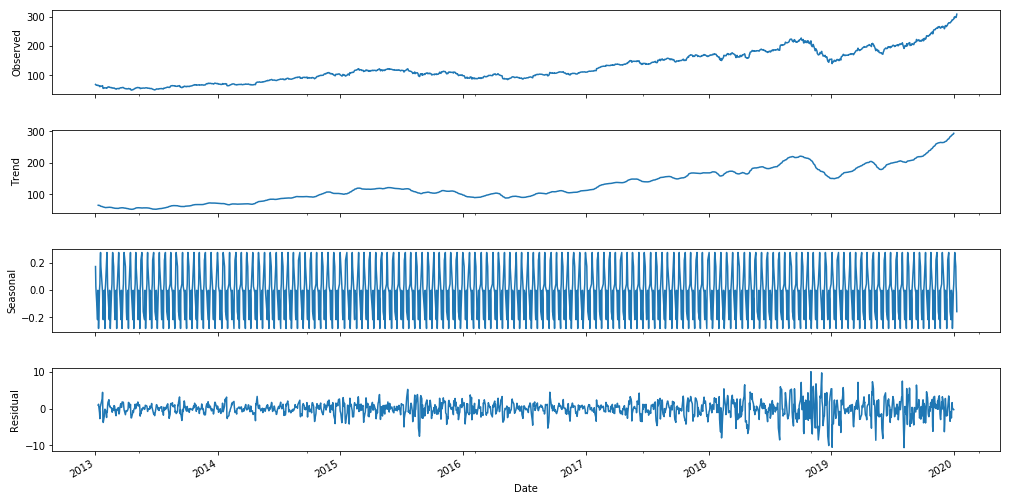

In [88]:
fig = ets_results.plot()
fig.set_size_inches(16,8)